In [1]:
# Append system path if needed
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages')
sys.path.append('/Users/li/Library/Python/3.7/lib/python/site-packages')

In [2]:
import os
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters

import akshare as ak
register_matplotlib_converters()

### 1. 回测国外ETF

In [53]:
import imp
import model
imp.reload(model)
from model import ETFPortfolio

portf_path = '../data/ETF/iSharesExpTechSoftware.csv'
portf_OHLC = '../data/ETF/iSharesExpTechSoftwarePerf.csv'
portf = ETFPortfolio('us', min_data_len=6)
portf.load_data(portf_path, portf_OHLC)
portf.train_test_split(training_period=5)
portf.process_data()

Training data: from 2011-11-08 00:00:00 to 2016-11-10 00:00:00
Test data: from 2016-11-10 00:00:00 to 2017-11-10 00:00:00


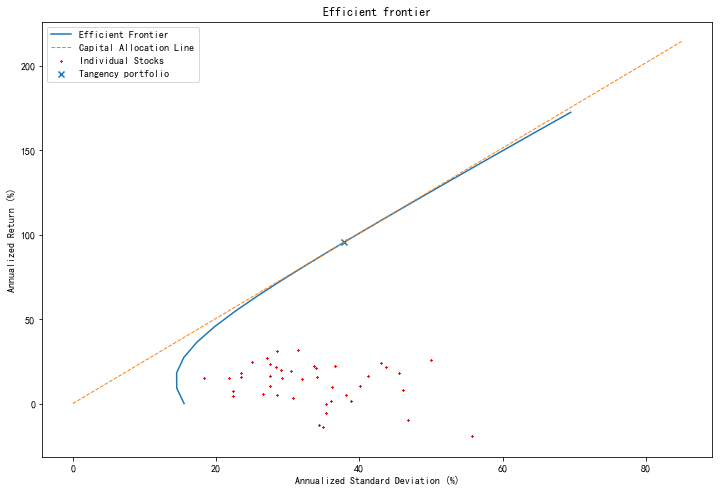

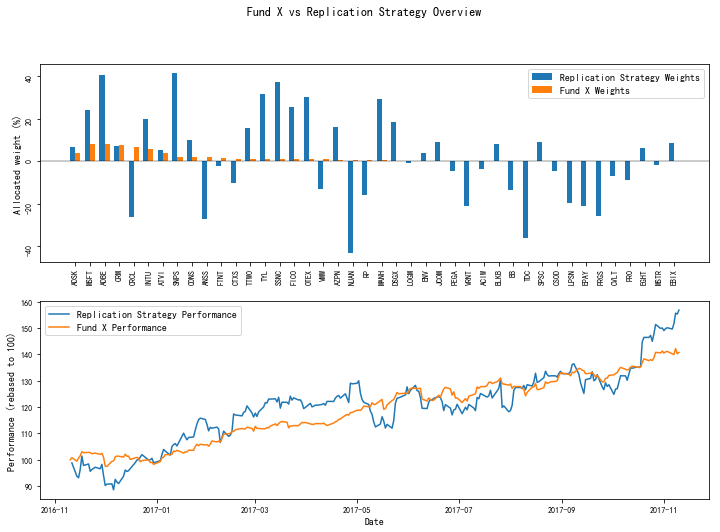

In [54]:
experiments=(
    (None, None),
    ('longonly', None),
    ('longonly', 0.1),
    ('longonly', 0.2),
    ('longonly', 0.4)
)

summary = {
    "Fund X": '',
    "Long/Short": '',
    "Long Only": '',
    "LO 10%Cap": '',
    "LO 20%Cap": ''
}

experiment = experiments[0]
portf.optimize(constraint=experiment[0], weightcap=experiment[1])
portf.backtest()
portf.build_frontier()
portf.visualize()

### 2. 回测上证50

In [1]:
import imp
import model
imp.reload(model)
from model import read_OHLC, ETFPortfolio

portf_path = '../data/ETF/000016_上证50.csv'
portf_OHLC = '../data/ETF/000016_上证50_perf.csv'
portf = ETFPortfolio('ak', min_data_len=6)
portf.load_data(portf_path, portf_OHLC)
portf.train_test_split(training_period=5)
portf.process_data()

In [ ]:
experiments=(
    (None, None),
    ('longonly', None),
    ('longonly', 0.1),
    ('longonly', 0.2),
    ('longonly', 0.4)
)

summary = {
    "Fund X": '',
    "Long/Short": '',
    "Long Only": '',
    "LO 10%Cap": '',
    "LO 20%Cap": ''
}

experiment = experiments[0]
portf.optimize(constraint=experiment[0], weightcap=experiment[1])
portf.backtest()
portf.build_frontier()
portf.visualize()